<b>
<br>
<font size="5"><p style="text-align: center;">Introdução à Programação de Computadores</p></font>
<br>
<font size="5"><p style="text-align: center;">Atividade Interativa #10</p></font>
</b>
<br><br>
<font size="4"><b>Professores:</b>
<br>
Jefersson A. dos Santos - jefersson@dcc.ufmg.br
<br>
João Guilherme Maia de Menezes - jgmm@dcc.ufmg.br
<br><br>
</font>
<hr>
<br>
<font size="3">
</font>

# Estatísticas sobre gastos parlamentares 
------------------

# 1. Introdução

---------------

A Cota para o Exercício da Atividade Parlamentar – CEAP (antiga verba indenizatória) é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar.

Nessa atividade prática você deverá implementar uma série de funções para geração de gráficos sobre os gastos parlamentares utilizando os dados publicamente disponíveis sobre as despesas do [CEAP](https://dadosabertos.camara.leg.br/swagger/api.html "Arquivos - Despesas pela Cota para Exercício da Atividade Parlamentar"). 


Você pode baixar os arquivos CSV do [site](https://dadosabertos.camara.leg.br/swagger/api.html) para a pasta **dados_parlamento** dentro do diretório onde se encontra o seu notebook (arquivo com extensão ipynb)

Não altere o nome dos arquivos:
* Ano-2009.csv
* Ano-2010.csv
* Ano-2011.csv
* Ano-2012.csv
* Ano-2013.csv
* Ano-2014.csv
* Ano-2015.csv
* Ano-2016.csv
* Ano-2017.csv

As suas funções para leitura dos arquivos devem utilizar caminhos relativos.<br>
Ou seja, para a leitura dos dados do arquivo Ano-2009.csv, por exemplo, o nome do arquivo passado para a função *open* deve ser "dados_parlamento/Ano-2009.csv". 

Não utilizar o caminho absoluto (por exemplo "C:\usuarios\m1011\documents\tp2\dados_parlamento\Ano-2009.csv") pois isso provavelmente impedirá que seu trabalho funcione em outra máquina além da sua.

# 2. O que deve ser feito
---------------

Para manipulação dos dados, você deverá implementar pelo menos (sendo permitida a implementação de outras funções, caso necessário):
<ol>
<li>Uma função para leitura dos dados. **Atenção:** (1) Observe que os dados estão codificados em formato UTF-8; (2) Observe que os arquivos são grandes. Talvez não seja uma boa ideia ler tudo e colocar em uma única lista. **FEITO!**</li>
<li>Uma função que retorna uma lista com os gastos totais da Câmara dos Deputados em um intervalo ('ano início' até 'ano fim').</li>
<li>Uma função que retorna uma lista com os gastos totais de todos os parlamentares em um ano específico.</li>
<li>Uma função que retorna os gastos médios totais dos parlamentares por partido para um ano específico.</li>
<li>Uma função que retorna os gastos médios totais dos parlamentares por estado para um ano específico.</li>
</ol>

As funções deverão ser utilizadas para plotar:
<ol>
<li>Um gráfico ilustrando a evolução dos gastos das cotas da Câmara dos Deputados entre 2009 e 2019.</li>
<li>Um gráfico de barras mostrando o total dos 20 parlamentares que mais gastaram em 2019.</li>
<li>Um gráfico de barras por partido, mostrando os gastos médios de seus parlamentares no ano de 2019.</li>
<li>Um gráfico de barras por estado, mostrando os gastos médios de seus parlamentares no ano de 2019.</li>
</ol>

No final, você deverá utilizar os gráficos para responder as seguintes perguntas:
<ol>
<li>Houve alguma redução nos gastos com o CEAP nos últimos anos em que o país vive uma crise de arrecadação?</li>
<li>Quais os parlamentares mais caros no exercício de 2019?</li>
<li>Quais os partidos que, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares?</li>
<li>Quais os estados, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares? Pelas regras de liberação dos auxílios para viagem, o esperado é que os estados mais distantes do DF custem mais. </li>
</ol>




In [0]:
# Criando a pasta
!mkdir dados_parlamentares

# Baixando os dados de 2019
!wget http://www.camara.leg.br/cotas/Ano-2019.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2018.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2017.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2016.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2015.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2014.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2013.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2012.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2011.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2010.csv.zip
!wget http://www.camara.leg.br/cotas/Ano-2009.csv.zip

!unzip Ano-2019.csv.zip
!unzip Ano-2018.csv.zip
!unzip Ano-2017.csv.zip
!unzip Ano-2016.csv.zip
!unzip Ano-2015.csv.zip
!unzip Ano-2014.csv.zip
!unzip Ano-2013.csv.zip
!unzip Ano-2012.csv.zip
!unzip Ano-2011.csv.zip
!unzip Ano-2010.csv.zip
!unzip Ano-2009.csv.zip

!mv *.csv dados_parlamentares/


In [1]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    #file = open(filename, 'r', encoding='ISO-8859-1')
    file = open(filename, 'r', encoding='UTF-8')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        #dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        dados.append(line.rstrip().replace('","','";"').split('";"'))
        dados[-1][0]=dados[-1][0].replace('"','')
        dados[-1][-1]=dados[-1][-1].replace('"','')
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

In [2]:
# Bibliotecas

import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

In [3]:
# Obtem dados dos arquivos csv de forma global

rotulos, dados_2009 = le_dados("dados_parlamentares/Ano-2009.csv")

rotulos, dados_2010 = le_dados("dados_parlamentares/Ano-2010.csv")

rotulos, dados_2011 = le_dados("dados_parlamentares/Ano-2011.csv")

rotulos, dados_2012 = le_dados("dados_parlamentares/Ano-2012.csv")

rotulos, dados_2013 = le_dados("dados_parlamentares/Ano-2013.csv")

rotulos, dados_2014 = le_dados("dados_parlamentares/Ano-2014.csv")

rotulos, dados_2015 = le_dados("dados_parlamentares/Ano-2015.csv")

rotulos, dados_2016 = le_dados("dados_parlamentares/Ano-2016.csv")

rotulos, dados_2017 = le_dados("dados_parlamentares/Ano-2017.csv")

rotulos, dados_2018 = le_dados("dados_parlamentares/Ano-2018.csv")

rotulos, dados_2019 = le_dados("dados_parlamentares/Ano-2019.csv")


In [4]:
#Constantes 
# Verificado que as posições são as mesmas em todos os arquivos

VALOR_GASTO = rotulos.index('vlrLiquido')
PARLAMENTAR = rotulos.index('\ufefftxNomeParlamentar')
PARTIDO = rotulos.index('sgPartido')
ESTADO = rotulos.index('sgUF')

In [5]:
# (2) Função que retorna uma lista com os gastos totais da Câmara em um intervalo ('ano início', 'ano fim'):

def buscar_gastos_totais(ano_inicio, ano_fim):
    gastos = []
    anos = np.arange(ano_inicio, ano_fim + 1)
        
    for ano in anos:
        gasto_total = 0     
        
        for registro in globals()['dados_'+ str(ano)]:            
            gasto_total += float(registro[VALOR_GASTO])
            
        gastos.append((ano, gasto_total))
        
    return gastos
    
#buscar_gastos_totais(2009, 2019)

In [11]:
# (3) Função que retorna uma lista com os gastos totais de todos os parlamentares em um ano específico:

def converter_gastos_parlamentar_dicionario_para_tupla(dicionario):
    gastos = []
    
    for parlamentar, gasto in dicionario.items():
        gastos.append((parlamentar, gasto))
        
    return gastos

def buscar_gastos_totais_por_parlamentar(ano):
    gastos = {}
    
    for registro in globals()['dados_'+ str(ano)]:   
        parlamentar = registro[PARLAMENTAR]      
        valor_gasto = float(registro[VALOR_GASTO])
        
        gastos[parlamentar] = gastos.get(parlamentar, 0.0) + valor_gasto
        
    return converter_gastos_parlamentar_dicionario_para_tupla(gastos)
        
#buscar_gastos_totais_por_parlamentar(2019)

In [7]:
# (4) Função que retorna os gastos médios totais dos parlamentares por partido para um ano específico:

def converter_gastos_partido_dicionario_para_tupla(dicionario):
    gastos = []
    
    for partido, parlamentares in dicionario.items():
        media = sum(parlamentares.values()) / len(parlamentares)
        gastos.append((partido, media))
        
    return gastos

def buscar_gastos_totais_por_partido(ano):
    gastos_partidos = {}
    
    for registro in globals()['dados_'+ str(ano)]: 
        partido = registro[PARTIDO]
        parlamentar = registro[PARLAMENTAR]      
        valor_gasto = float(registro[VALOR_GASTO])
        
        if partido != '':       
            gastos_parlamentares = gastos_partidos.get(partido, {})
            gastos_parlamentares[parlamentar] = gastos_parlamentares.get(parlamentar, 0.0) + valor_gasto
            gastos_partidos[partido] = gastos_parlamentares
        
    return converter_gastos_partido_dicionario_para_tupla(gastos_partidos)
    
#buscar_gastos_totais_por_partido(2019)

In [8]:
# (5) Função que retorna os gastos médios totais dos parlamentares por estado para um ano específico:

def converter_gastos_estado_dicionario_para_tupla(dicionario):
    gastos = []
    
    for estado, parlamentares in dicionario.items():
        media = sum(parlamentares.values()) / len(parlamentares)
        gastos.append((estado, media))
        
    return gastos

def buscar_gastos_totais_por_estado(ano):
    gastos_estados = {}
    
    for registro in globals()['dados_'+ str(ano)]: 
        estado = registro[ESTADO]
        parlamentar = registro[PARLAMENTAR]      
        valor_gasto = float(registro[VALOR_GASTO])
        
        if estado != '' and estado != 'NA':            
            gastos_parlamentares = gastos_estados.get(estado, {})
            gastos_parlamentares[parlamentar] = gastos_parlamentares.get(parlamentar, 0.0) + valor_gasto
            gastos_estados[estado] = gastos_parlamentares 
    
    return converter_gastos_estado_dicionario_para_tupla(gastos_estados)          
            
#buscar_gastos_totais_por_estado(2019)
    

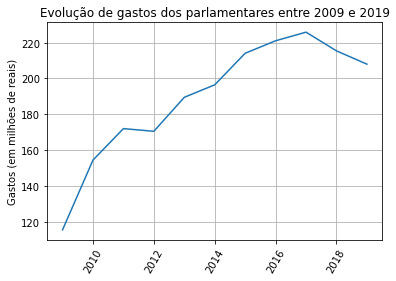

In [9]:
# (1) Gráfico ilustrando a evolução dos gastos das cotas da Câmara dos Deputados entre 2009 e 2019:

def criar_grafico_gastos_anos(dados):    
    x = []
    y = []
    
    for ano, gastos in dados:
        x.append(ano)
        y.append(gastos/(10**6)) # Em milhões

    plt.plot(x,y)    

    plt.ylabel('Gastos (em milhões de reais)')
    plt.title('Evolução de gastos dos parlamentares entre 2009 e 2019')    
    
    plt.xticks(rotation=60)
    plt.grid(True)

    plt.show() 

criar_grafico_gastos_anos(buscar_gastos_totais(2009, 2019))

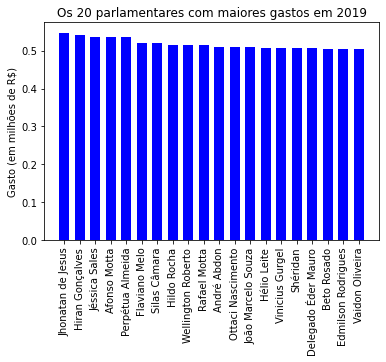

In [12]:
# (2) Gráfico de barras mostrando o total dos 20 parlamentares que mais gastaram em 2019:

def criar_grafico_gastos_parlamentares_20_maiores(ano, dados): 
    x = []
    y = []
    gastos_ordenados = sorted(dados, reverse=True, key=itemgetter(1))
   
    for parlamentar, gastos in gastos_ordenados[:20]:
        x.append(parlamentar)
        y.append(float(gastos)/(10**6)) # Em milhões
    
    plt.bar(np.arange(len(y)), y, width=0.65, color='b')
    
    plt.title('Os 20 parlamentares com maiores gastos em ' + str(ano))
    plt.ylabel('Gasto (em milhões de R$)')
    
    plt.xticks(np.arange(len(y)), x, rotation=90)
    
    plt.show()
    
criar_grafico_gastos_parlamentares_20_maiores(2019, buscar_gastos_totais_por_parlamentar(2019))

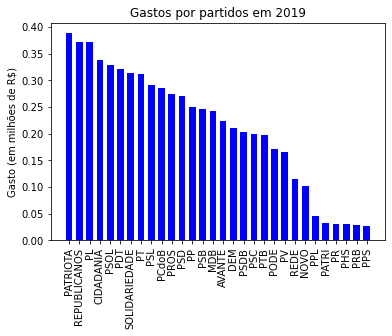

In [13]:
# (3) Gráfico de barras por partido, mostrando os gastos médios de seus parlamentares no ano de 2019:

def criar_grafico_gastos_partidos(ano, dados):   
    x = []
    y = []
    gastos_ordenados = sorted(dados, reverse=True, key=itemgetter(1))
   
    for partido, gastos in gastos_ordenados:
        x.append(partido)
        y.append(float(gastos)/(10**6)) # Em milhões
    
    plt.bar(np.arange(len(y)), y, width=0.65, color='b')
    
    plt.title('Gastos por partidos em ' + str(ano))
    plt.ylabel('Gasto (em milhões de R$)')
    
    plt.xticks(np.arange(len(y)), x, rotation=90)

    plt.show()

criar_grafico_gastos_partidos(2019, buscar_gastos_totais_por_partido(2019))

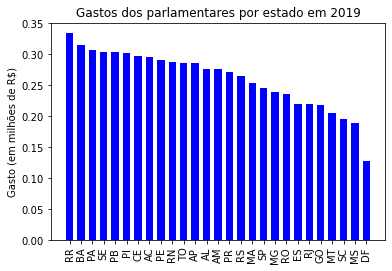

In [14]:
# (4) Gráfico de barras por estado, mostrando os gastos médios de seus parlamentares no ano de 2019:

def criar_grafico_gastos_estados(ano, dados):
    x = []
    y = []
    gastos_ordenados = sorted(dados, reverse=True, key=itemgetter(1))
   
    for estado, gastos in gastos_ordenados:
        x.append(estado)
        y.append(float(gastos)/(10**6)) # Em milhões
    
    plt.bar(np.arange(len(y)), y, width=0.65, color='b')
    
    plt.title('Gastos dos parlamentares por estado em ' + str(ano))
    plt.ylabel('Gasto (em milhões de R$)')
    
    plt.xticks(np.arange(len(y)), x, rotation=90)
    
    plt.show()
    
criar_grafico_gastos_estados(2019, buscar_gastos_totais_por_estado(2019))

In [51]:
# Respondendo as perguntas:

# 1- Houve alguma redução nos gastos com o CEAP nos últimos anos em que o país vive uma crise de arrecadação?
# É possível observar pelo Gráfico 1 - Evolução de gastos dos parlamentares entre 2009 e 2019 que por volta de 2017
# os gastos por palamentares começou a cair.

# 2- Quais os parlamentares mais caros no exercício de 2019?
# Segundo o Gráfico 2 - Os 20 parlamentares com maiores gastos em 2019, os parlamentares mais caros foram:
# 1° Jhonatan de Jesus |  6° Flaviano Melo      | 11° André Abdon        | 16° Shéridan 
# 2° Hiran Gonçalves   |  7° Silas Câmara       | 12° Ottaci Nascimento  | 17° Delegado Éder Mauro 
# 3° Jéssica Sales     |  8° Hildo Rocha        | 13° João Marcelo Souza | 18° Beto Rosado 
# 4° Afonso Motta      |  9° Wellington Roberto | 14° Hélio Leite        | 19° Edmilson Rodrigues 
# 5° Perpétua Almeida  | 10° Rafael Motta       | 15° Vinicius Gurgel    | 20° Vaidon Oliveira

# 3- Quais os partidos que, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares?
# Segundo o Gráfico 3 - Gastos por partidos em 2019, em média, os partidos que mais custam para o Brasil são: Patriotas,
# Republicanos e PL.

# 4- Quais os estados, na média, mais "custam" para o Brasil em termos de auxílios a parlamentares? Pelas regras de
# liberação dos auxílios para viagem, o esperado é que os estados mais distantes do DF custem mais.
# Segundo o Gráfico 4 - Gastos dos parlamentares por estado em 2019, os cinco estados que mais custaram foram Roraima, Bahia,
# Pará, Sergipe e Paraíba, estados das regiões Norte e Nordeste (relativamente distantes de DF). Além disso, o Distrito Federal
# é o que custa menos.

